<a href="https://colab.research.google.com/github/LinaMariaCastro/curso-ia-para-economia/blob/main/clases/4_Aprendizaje_no_supervisado/3_Taller_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Inteligencia Artificial con Aplicaciones en Economía I**

- 👩‍🏫 **Profesora:** [Lina María Castro](https://www.linkedin.com/in/lina-maria-castro)  
- 📧 **Email:** [lmcastroco@gmail.com](mailto:lmcastroco@gmail.com)  
- 🎓 **Universidad:** Universidad Externado de Colombia - Facultad de Economía

# **Taller: Análisis de Componentes Principales - PCA**

**IMPORTANTE**: Guarda una copia de este notebook en tu Google Drive o computador.

**Taller en parejas**

**Nombres estudiantes:**

-Yuli Fernanda Esquivel Martinez

-María José González Serrano

**Forma de entrega**

Jupyter Notebook publicado en su cuenta de Github con el nombre “Taller_PCA_apellidos_estudiantes.ipynb”.

**Plazo de entrega**

Hoy, 21 de octubre, máximo a las 11:59 p.m., debes enviar link del notebook al correo lina.castro6@uexternado.edu.co, de lo contrario, no será tenido en cuenta.

**Instrucciones Generales**

Completa el código en las celdas marcadas con `### TU CÓDIGO AQUÍ ###`. Puedes añadir más celdas si lo requieres.

**Caso de Estudio: Consultoría para "Inversiones Inmobiliarias S.A."** 🏢

**El Escenario:**

Acaban de ser contratados como analistas de datos en **"Inversiones Inmobiliarias S.A."**, una firma líder en el sector de bienes raíces en la región. La firma está buscando expandir sus operaciones, pero se enfrenta a un desafío común: el mercado inmobiliario es complejo y está influenciado por una multitud de factores.

**El Problema:**

El equipo de valoración de propiedades actualmente utiliza modelos basados principalmente en metros cuadrados y número de habitaciones. Sin embargo, saben que factores como la **ubicación** (proximidad a parques, hospitales, transporte), la **seguridad** (tasa de criminalidad) y las **características intrínsecas** de la propiedad (baños, tamaño) interactúan de formas complejas. Tienen muchos datos (`houses.csv`), pero les cuesta extraer una visión clara y concisa de qué define realmente el "atractivo" de una propiedad más allá de lo obvio. Comparar propiedades con perfiles multidimensionales diferentes es difícil y propenso a errores.

**Su Misión (como consultores):**

La dirección les ha encargado aplicar técnicas avanzadas de *machine learning* para abordar este problema. Específicamente, quieren que utilicen el **Análisis de Componentes Principales (PCA)** para:

1.  **Reducir la Complejidad:** Tomar las múltiples características de las propiedades y destilarlas en un número menor de "factores" o "índices" clave que capturen la esencia de lo que impulsa el valor.
2.  **Crear Índices Interpretables:** No basta con reducir dimensiones; deben poder explicar qué significan estos nuevos índices en términos de negocio (ej. "Índice de Tamaño y Comodidades", "Índice de Calidad de Ubicación").

**Su Entregable:**

Deberán completar este Jupyter Notebook, realizando el análisis de PCA sobre el dataset `houses.csv`, interpretando los componentes principales y creando las visualizaciones solicitadas. Sus conclusiones serán presentadas al comité de inversiones para ayudarles a tomar decisiones más informadas.

# 1. Importa las librerías necesarias

In [ ]:
### TU CÓDIGO AQUÍ ###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

### Mejorar visualización de dataframes y gráficos

In [ ]:
# Que muestre todas las columnas
pd.options.display.max_columns = None
# En los dataframes, mostrar los float con dos decimales
pd.options.display.float_format = '{:,.2f}'.format

# Configuraciones para una mejor visualización
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# 2 Carga el dataset "houses.csv" que se encuentra en el repositorio del curso, carpeta "datasets" y muestra las primeras 5 filas.

In [ ]:
### TU CÓDIGO AQUÍ ###
dataset=pd.read_csv('houses.csv')

In [ ]:
dataset.head()

,Id,Region,Bedrooms,Bathrooms,Square_Meters,Dist_to_Park,Dist_to_Hospital,Dist_to_Underground,Dist_to_School,Crime_Rate,Price
0,0,South,1,1,53,592,2436,2663,963,High,550353
1,1,East,3,2,70,640,652,2532,510,High,780430
2,2,North,2,2,79,1831,1485,7837,586,Medium,455771
3,3,West,6,5,189,255,974,2523,1152,Low,766631
4,4,West,7,6,199,1602,584,9690,615,Medium,757092


# 3. Análisis Exploratorio y Preprocesamiento de Datos

PCA tiene dos requisitos fundamentales:
1.  **Solo funciona con variables numéricas.**
2.  **Es muy sensible a la escala de las variables.**

Por lo tanto, nuestro trabajo en esta sección es: identificar las variables relevantes, convertirlas a un formato numérico y estandarizarlas.

## 3.1. Revisa si hay valores nulos y muestra el tipo de dato de cada una de las columnas

In [ ]:
### TU CÓDIGO AQUÍ ###
dataset.isna().sum()

,0
Id,0
Region,0
Bedrooms,0
Bathrooms,0
Square_Meters,0
Dist_to_Park,0
Dist_to_Hospital,0
Dist_to_Underground,0
Dist_to_School,0
Crime_Rate,0


In [ ]:
dataset.dtypes

,0
Id,int64
Region,object
Bedrooms,int64
Bathrooms,int64
Square_Meters,int64
Dist_to_Park,int64
Dist_to_Hospital,int64
Dist_to_Underground,int64
Dist_to_School,int64
Crime_Rate,object


## 3.2. Codifica las Variables Categóricas Region y Crime_Rate

* **Region:** Es una variable nominal (no hay un orden inherente). Por tanto, usa **One-Hot Encoding**. Incluye en el código drop_first=True y dtype=int.
* **Crime_Rate:** Es una variable ordinal (Low < Medium < High). Por tanto, dale un valor numérico según este diccionario: mapping = {'High': 3, 'Medium': 2, 'Low': 1}

In [ ]:
### TU CÓDIGO AQUÍ ###
dummies = pd.get_dummies(dataset['Region'], prefix='Region', drop_first=True, dtype=int, dummy_na=True)
dataset = pd.concat([dataset, dummies], axis=1)
print(dummies.head())




   Region_North  Region_South  Region_West  Region_nan
0             0             1            0           0
1             0             0            0           0
2             1             0            0           0
3             0             0            1           0
4             0             0            1           0


In [ ]:
mapping = {'High': 3, 'Medium': 2, 'Low': 1}
dataset['Crime_Rate_encoded'] = dataset['Crime_Rate'].map(mapping)

print(dataset.head())

   Id Region  Bedrooms  Bathrooms  Square_Meters  Dist_to_Park  \
0   0  South         1          1             53           592   
1   1   East         3          2             70           640   
2   2  North         2          2             79          1831   
3   3   West         6          5            189           255   
4   4   West         7          6            199          1602   

   Dist_to_Hospital  Dist_to_Underground  Dist_to_School Crime_Rate   Price  \
0              2436                 2663             963       High  550353   
1               652                 2532             510       High  780430   
2              1485                 7837             586     Medium  455771   
3               974                 2523            1152        Low  766631   
4               584                 9690             615     Medium  757092   

   Region_North  Region_South  Region_West  Region_nan  Region_North  \
0             0             1            0           0  

## 3.3. Selección y Estandarización de Variables

Ahora seleccionaremos todas las variables predictoras (features) y las estandarizaremos. La estandarización (dejar cada variable con media 0 y desviación estándar 1) es **crucial**. Si no lo hiciéramos, la variable con la mayor escala (por ejemplo, `Square_Meters`) dominaría el análisis de PCA, ya que PCA busca maximizar la varianza.

In [ ]:
# Eliminar columnas duplicadas del dataset
dataset = dataset.loc[:, ~dataset.columns.duplicated()]

# Verificar que quedaron solo las columnas únicas
print("Columnas después de eliminar duplicados:")
print(dataset.columns.tolist())

Columnas después de eliminar duplicados:
['Id', 'Region', 'Bedrooms', 'Bathrooms', 'Square_Meters', 'Dist_to_Park', 'Dist_to_Hospital', 'Dist_to_Underground', 'Dist_to_School', 'Crime_Rate', 'Price', 'Region_North', 'Region_South', 'Region_West', 'Region_nan', 'Crime_Rate_encoded']


In [ ]:
# Seleccionamos las columnas que usaremos para PCA
# Excluimos el ID, las categóricas originales y el precio (nuestra variable respuesta)
features = ['Bedrooms', 'Bathrooms', 'Square_Meters', 'Dist_to_Park',
            'Dist_to_Hospital', 'Dist_to_Underground', 'Dist_to_School',
            'Crime_Rate_encoded', 'Region_North', 'Region_South', 'Region_West']

X = dataset[features]
y = dataset['Price']

Estandariza las variables que se encuentran en X. Llama al nuevo objeto X_scaled.

In [ ]:
### TU CÓDIGO AQUÍ ###
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print('Dimensiones de los datos estandarizados:', X_scaled.shape)

Dimensiones de los datos estandarizados: (1000, 11)


## 3.4. Grafica un mapa de calor para ver las correlaciones entre las variables predictoras (features).

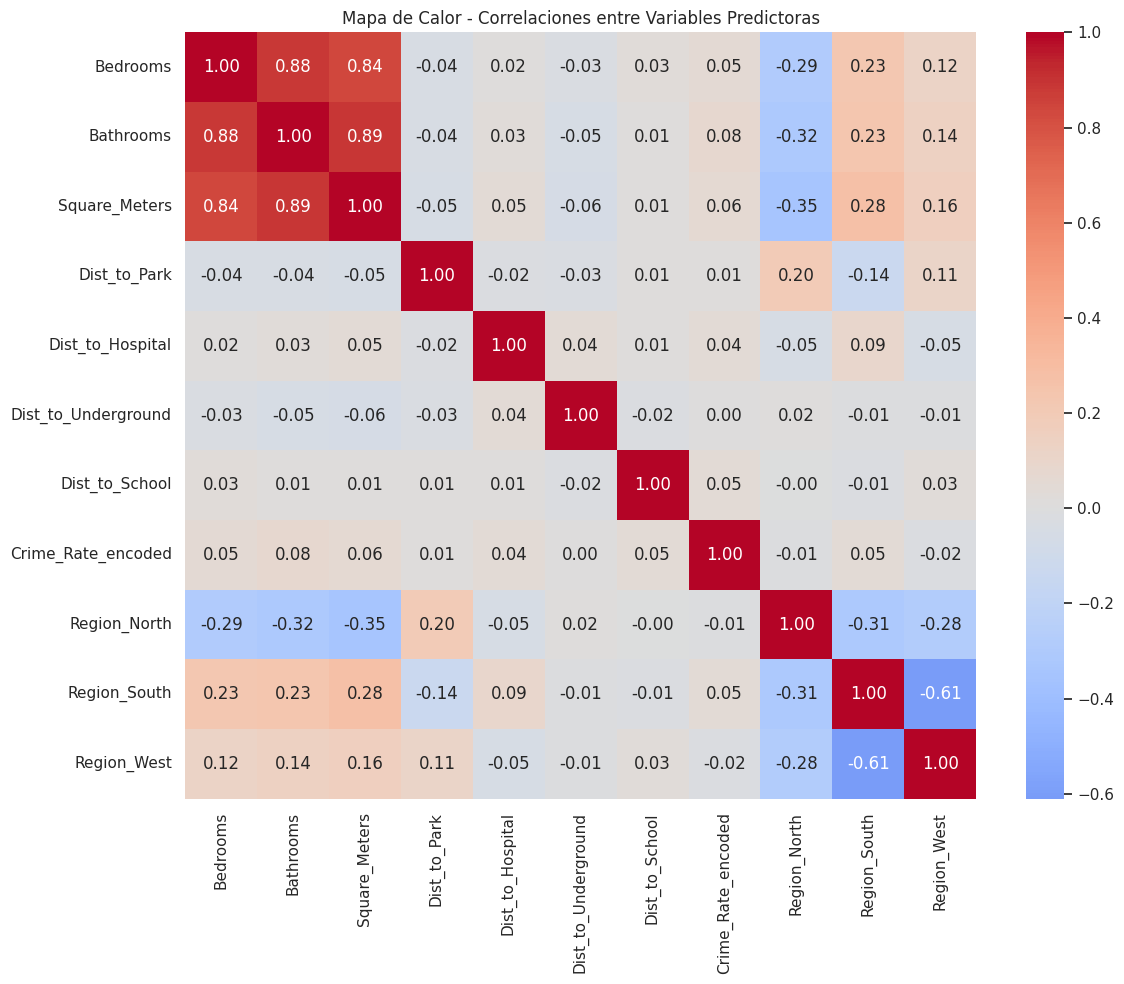

In [ ]:
### TU CÓDIGO AQUÍ ###
correlation_matrix = X.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Mapa de Calor - Correlaciones entre Variables Predictoras')
plt.tight_layout()
plt.show()

## 3.5. Escribe un análisis sobre las correlaciones observadas. Haz énfasis en las correlaciones más altas (positivas o negativas).

RTA:

Correlaciones Fuertes Negativas:

-Region_South - Region_West (-0.61): Correlación negativa esperada (son variables dummy mutuamente excluyentes).
-Region_North - Square_Meters (-0.35): Las casas en la región Norte tienden a ser más pequeñas.
-Region_North - Bathrooms (-0.32): Menos baños en la región Norte.

Correlaciones Débiles (cercanas a 0):

-Las distancias (Park, Hospital, Underground, School) muestran correlaciones muy débiles con otras variables.
-Crime_Rate_encoded no muestra correlaciones significativa

# 4. Aplicando el Análisis de Componentes Principales (PCA)

Con los datos limpios y estandarizados, es hora de aplicar PCA. Nuestro objetivo es determinar cuántos componentes principales necesitamos para capturar una cantidad significativa de la "información" (varianza) de nuestros datos originales.

## 4.1. Instancia PCA. No especifiques n_components para calcularlos todos. Ajusta PCA a los datos escalados.

In [ ]:
### TU CÓDIGO AQUÍ ###
pca = PCA()
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)

print("Número de componentes calculados:", pca.n_components_)
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)

Número de componentes calculados: 11
Varianza explicada por cada componente: [0.27836505 0.15083451 0.10204937 0.09597655 0.09215551 0.08655888
 0.08503494 0.07169356 0.01655604 0.01231371 0.00846187]


## 4.2. Varianza Explicada

El aspecto más importante de PCA es la **varianza explicada**. Cada componente principal explica un porcentaje de la varianza total de los datos. El primer componente siempre explica la mayor parte, el segundo un poco menos, y así sucesivamente.

Grafica la varianza explicada acumulada para decidir cuántos componentes son suficientes.

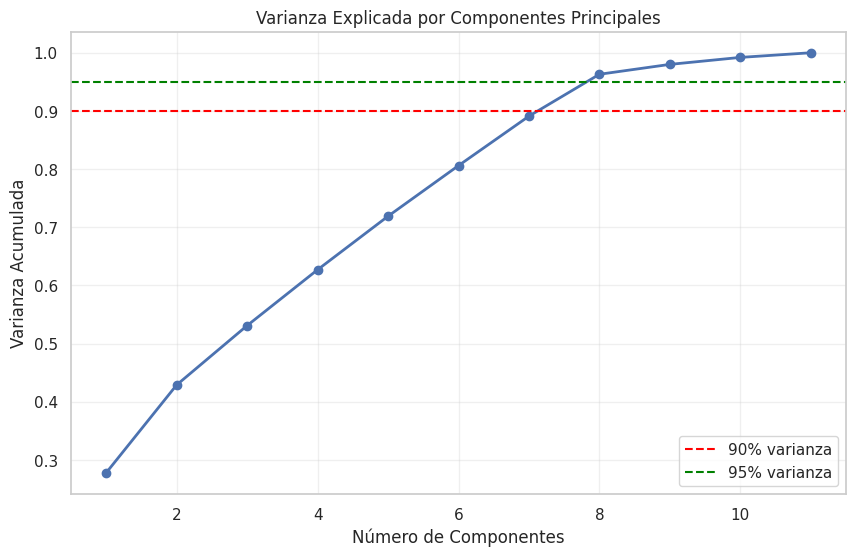

90% de varianza: 8 componentes
95% de varianza: 8 componentes


In [ ]:
 # 4.2. Gráfico de varianza explicada acumulada

varianza_explicada = [0.278, 0.151, 0.102, 0.096, 0.092, 0.087, 0.085, 0.072, 0.017, 0.012, 0.008]
varianza_acumulada = np.cumsum(varianza_explicada)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 12), varianza_acumulada, 'bo-', linewidth=2)
plt.axhline(y=0.90, color='red', linestyle='--', label='90% varianza')
plt.axhline(y=0.95, color='green', linestyle='--', label='95% varianza')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada')
plt.title('Varianza Explicada por Componentes Principales')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Mostrar cuántos componentes para 90% y 95%
for i, var in enumerate(varianza_acumulada):
    if var >= 0.90:
        print(f"90% de varianza: {i+1} componentes")
        break

for i, var in enumerate(varianza_acumulada):
    if var >= 0.95:
        print(f"95% de varianza: {i+1} componentes")
        break

Este gráfico es nuestra herramienta de decisión. Nos muestra el **trade-off entre simplicidad e información**.
- Si queremos el modelo más simple posible, podríamos usar 2 o 3 componentes, pero solo explicaríamos 40-50% de la variabilidad en los datos (perderíamos mucha información).
- Una regla común en la industria es mantener suficientes componentes para explicar entre el 90% y el 95% de la varianza.

In [ ]:
pca_final = PCA(n_components=7)
X_pca_final = pca_final.fit_transform(X_scaled)

## 4.3. ¿Con cuántos componentes se captura el 90% de la información contenida en nuestras 11 variables originales?
RTA: Con 7 componentes se captura el 89.1% de la información

# 5. Re-aplicando PCA indicando el Número de Componentes Deseados

Corre PCA de nuevo, pero esta vez especificando que queremos quedarnos con 4 componentes.

In [ ]:
### TU CÓDIGO AQUÍ ###
pca_4 = PCA(n_components=4)
X_pca_4 = pca_4.fit_transform(X_scaled)

print(f"Shape con 4 componentes: {X_pca_4.shape}")
print(f"Varianza explicada con 4 componentes: {sum(pca_4.explained_variance_ratio_):.1%}")

Shape con 4 componentes: (1000, 4)
Varianza explicada con 4 componentes: 62.7%


Hemos reducido las dimensiones, pero ¿qué significan estas nuevas 4 variables? Para un economista, esta es la parte más importante. Debemos "bautizar" a nuestros componentes entendiendo qué variables originales los componen.

Esto lo hacemos analizando los **loadings** (cargas o pesos) de cada variable original en cada componente.

## 5.1. Grafica el mapa de calor de los loadings

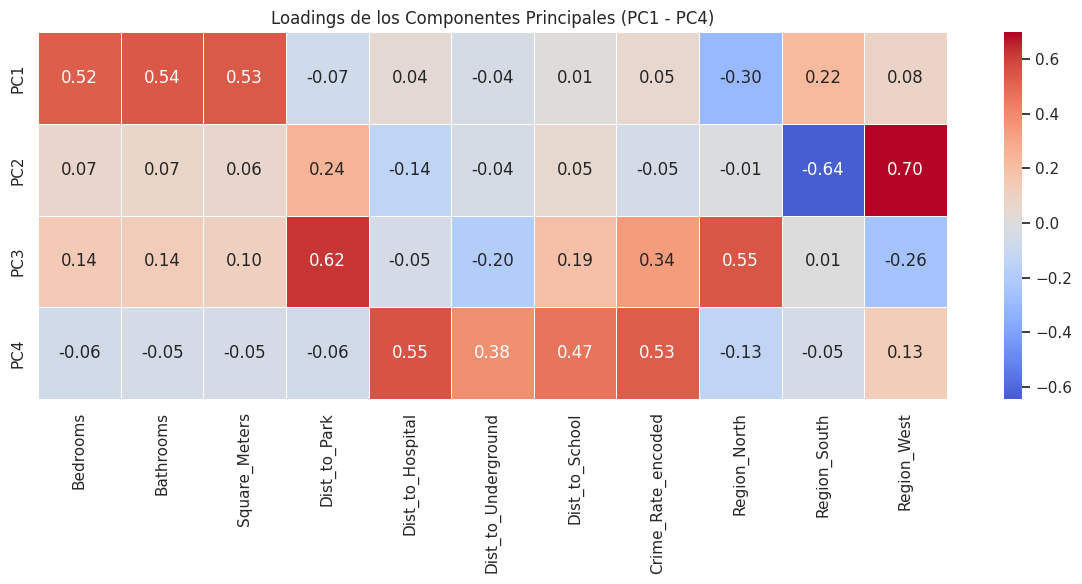

In [ ]:
### TU CÓDIGO AQUÍ ###
loadings = pca_4.components_

loadings_df = pd.DataFrame(loadings,
                          columns=features,
                          index=[f'PC{i+1}' for i in range(4)])

plt.figure(figsize=(12, 6))
sns.heatmap(loadings_df,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            linewidths=0.5)
plt.title('Loadings de los Componentes Principales (PC1 - PC4)')
plt.tight_layout()
plt.show()

## 5.2. Realiza una interpretación de los componentes. ¿Cuáles variables tienen las cargas altas y positivas y cuáles las cargas altas y negativas? De acuerdo con este análisis, ¿qué nombre le darías a cada componente?
RTA:

PC1: Medidas de la casa

Tiene números altos en: habitaciones, baños y metros cuadrados

Esto significa que mide qué tan grande es la casa

PC2: Ubicación Oeste

Número alto en Región Oeste

Número bajo en Región Sur

Esto diferencia casas del Oeste vs Sur

PC3: Cercanía al parque en el Norte

Número alto en distancia al parque (está cerca)

Número alto en Región Norte

Número alto en crimen

Son casas del Norte cerca de parques pero con más crimen

PC4: Lejanía de servicios

Números altos en distancia a hospital, metro y escuela

Número alto en crimen

Son casas lejos de todo y con más crimen